<a href="https://colab.research.google.com/github/jiyoung830/data_structure-lab/blob/master/Lec07_Serch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Multiplication Method

In [ ]:
import math
def multiplication_hash(k,m,A=(math.sqrt(5)-1/2)):
  frac = k * A % 1
  return math.floor(m * frac)

2. Folding Method

In [ ]:
import math
def folding_hash(k,m, group = 2):
  base = 10 ** group
  s = 0
  while k>0 :
    s+= k % base
    k //= base
  return s % m



3. Mid-squaare Method

In [ ]:
import math
def  mid_square_hash(k,m):
  s = k ** 2
  mid = (len(str(s))//2)    # 가운데 위치
  return int(str(s)[mid:mid+2]) % m


In [ ]:
m = 16
keys = [123,125,616]
print("key | mult | fold | mid")
for k in keys:
  print(f"{k} | {multiplication_hash(k,m)} | {folding_hash(k,m)} | {mid_square_hash(k,m)}")

key | mult | fold | mid
123 | 8 | 8 | 12
125 | 0 | 10 | 14
616 | 6 | 6 | 13


6. Hashing


hashing a string

In [ ]:
ord('c')

99

In [ ]:
ord('a')

97

In [ ]:
ord('t')

116

In [1]:
def hash(a_string, table_size):
  sum = 0
  for pos in range(len(a_string)):
    sum = sum + pos*ord(a_string[pos])

  return sum % table_size

In [14]:
class HashTable:
  def __init__(self,size=11) :
    self.size = size
    self.slots = [None] * self.size
    self.data = [None] * self.size

  def put(self,key,data):
    hash_value = self.hash_function(key,len(self.slots))

    if self.slots[hash_value] == None:   # 해당  hash_value 자리가 비어있으면
      self.slots[hash_value] = key
      self.data[hash_value] = data
    else:                                 # 해당  hash_value 자리에 이미 존재하면
      if self.slots[hash_value] == key:   # 같은 Key이면
        self.data[hash_value] = data      # replace
      else:                               # 같은 Key가 아니면 nesxt slot 찾아야 함
        next_slot = self.rehash(hash_value,len(self.slots))       # rehash
        #비어있지 않고 key랑 다른 경우 반복
        while self.slots[next_slot] != None and self.slots[next_slot] != key :
          next_slot = self.rehash(next_slot,len(self.slots))

        if self.slots[next_slot] == None:
          self.slots[next_slot] = key
          self.data[next_slot] = data
        else:
          self.data[next_slot] = data     #replace

  def hash_function(self,key,size):
    return key % size

  def rehash(self,old_hash,size):
    return (old_hash+1) % size

  def get(self,key):
    start_slot = self.hash_function(key,len(self.slots))
    data = None
    stop = False
    found = False
    position = start_slot
    while self.slots[position] != None and not found and not stop:
      if self.slots[position] == key:
        found = True
        data = self.data[position]
      else:
        position = self.rehash(position,len(self.slots))
        if position == start_slot:
          stop = True
    return data

  def __getitem__(self,key):
    return self.get(key)

  def __setitem__(self,key,data):
    self.put(key,data)

In [21]:
h=HashTable()

In [22]:
h[54] = "cat"
h[26] = "dog"
h[93] = "lion"
h[17] = "tiger"
h[77] = "bird"
h[31] = "cow"
h[44] = "goat"
h[55] = "pig"
h[20] = "chicken"

In [23]:
h.slots

[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]

In [24]:
h.data

['bird',
 'goat',
 'pig',
 'chicken',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [25]:
h[20]

'chicken'

In [27]:
h.put(20,"deer")

In [28]:
h.data

['bird',
 'goat',
 'pig',
 'deer',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [30]:
h.put(31,"monkey")

In [31]:
h.data

['bird',
 'goat',
 'pig',
 'deer',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'monkey',
 'cat']

In [32]:
h.put(36,"hipo")

In [33]:
h.data

['bird',
 'goat',
 'pig',
 'deer',
 'dog',
 'lion',
 'tiger',
 'hipo',
 None,
 'monkey',
 'cat']

In [34]:
print(h[77])

bird


In [35]:
print(h[99])

None


7.Binary Search Vs. Hashing

In [51]:
import timeit
import random
import matplotlib.pyplot as plt

In [53]:
class HashTable:                                    # 1번 해결: HashTable 클래스 정의
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def __setitem__(self, key, value):
        index = key % self.size
        self.table[index] = value

    def __getitem__(self, key):
        index = key % self.size
        return self.table[index]

In [55]:
# 3번 해결: binary_search 함수 정의
def binary_search(lst, target):
    low = 0
    high = len(lst) - 1
    while low <= high:
        mid = (low + high) // 2
        if lst[mid] == target:
            return mid
        elif lst[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1


In [54]:
def prep_ht(size):
  ht = HashTable(size)
  for x in range(size):
    ht[x] = x             # 키 값 x를 저장
  return ht

In [56]:
def time_bin_search(size):
  return timeit.timeit('binary_search(lst,random.randrange({}))'.format(size),        #interpolate
                     'import random ; from __main__ import binary_search ;'
                     'lst = [x for x in range({})]'.format(size),                      # interpolate size into
                     number=50)

def time_hash(size):
  return timeit.timeit('ht[random.randrange({})]'.format(size),
                     'import random ; from __main__ import prep_ht ;'
                     'ht = prep_ht({})'.format(size),
                     number=50)

bin_search_timings = [time_bin_search(n) for n in range(10,10000,100)]
hash_timings = [time_hash(n) for n in range(10,10000,100)]

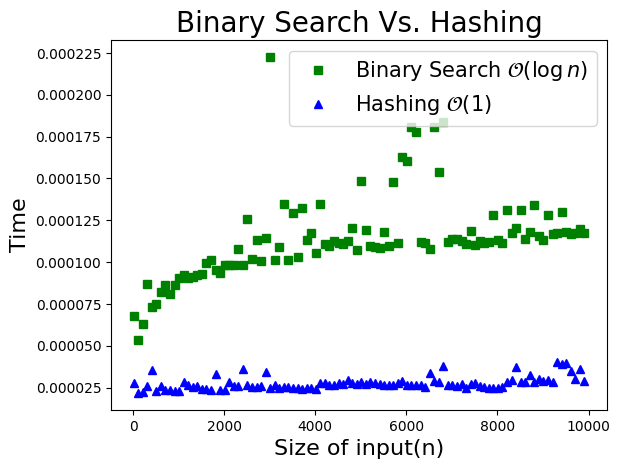

In [59]:
plt.xlabel('Size of input(n)', fontsize= 16)
plt.ylabel('Time', fontsize= 16)
plt.title('Binary Search Vs. Hashing', fontsize= 20)
plt.plot(range(10,10000,100), bin_search_timings,'gs')
plt.plot(range(10,10000,100), hash_timings,'b^')
plt.legend([r'Binary Search $\mathcal{O}(\log n)$',r'Hashing $\mathcal{O}(1)$'],loc='best', fontsize=15);
#plt.legend([Binary Search $|mathcal{0}(\log n)$','Hashing $\mathcal(0)(1)$'],loc='best', fontsize=15);
plt.show()